In [1]:
import qmcpy as qp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cProfile
import pstats
#Used to store some result computations for comparison.
import pickle

**Define functions**

We define various functions for use, including an option to toggle multithreading or multiprocessing with a boolean. To ensure result reproducibility, a specific seed is employed, eliminating variability. The 'cores' variable sets the maximum number of cores utilized by multiprocessing methods. If 'cores' is set to None, Python is free to use as many cores as it wants.

In [2]:
cores = None
test_seed = 24
def natural(n, point_num, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,thread=False)
    points = l.gen_samples(point_num) 
    return points
def linear(n, point_num, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,thread=False)
    points = l.gen_samples(point_num) 
    return points
def mps(n, point_num, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,thread=False)
    points = l.gen_samples(point_num) 
    return points
def natural_process(n, point_num, seed=None, cores = None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,process=True,max_workers=cores)
    points = l.gen_samples(point_num) 
    return points
def linear_process(n, point_num, seed=None, cores = None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,process=True,max_workers=cores)
    points = l.gen_samples(point_num) 
    return points
def mps_process(n, point_num, seed=None, cores = None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,process=True,max_workers=cores)
    points = l.gen_samples(point_num) 
    return points


**Part 1 comparison between normal computation and multiprocessing**

**Having fixed sample points (2^n) with variable dimension**

In [3]:
trials = 5
dimension_list = [50, 100, 200, 500, 1400, 3500]
n = 10
data = {'Dimensions':dimension_list}
dimension_frame = pd.DataFrame(data)
dimension_frame = dimension_frame.set_index('Dimensions')
names = set()


run_list = [(natural, "natural"),(linear, "linear"),(mps,"mps"),(natural_process, "natural process"),(linear_process,"linear process"),(mps_process, "mps process")]

for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for d in dimension_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, 2 ** n, seed=test_seed)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    dimension_frame[method_name] = times  
stats.sort_stats('cumulative')


names = list(names)

In [4]:
comparison= [('mps', 'mps process'), ('linear', 'linear process'), ('natural', 'natural process')]

def speed_up_cal(data_frame, compare_list, column_list, end_suffix):
    result = []
    for seq,pro in compare_list:
        result = []
        for x in column_list:
            a = data_frame[seq][x]
            b = data_frame[pro][x]
            result.append(a/b)
        data_frame[seq + " " + end_suffix] = result

suffix = "normal/process speed-up"
speed_up_cal(dimension_frame, comparison, dimension_list, suffix)


**Viewing the results for a constant point number and variable dimensions.**

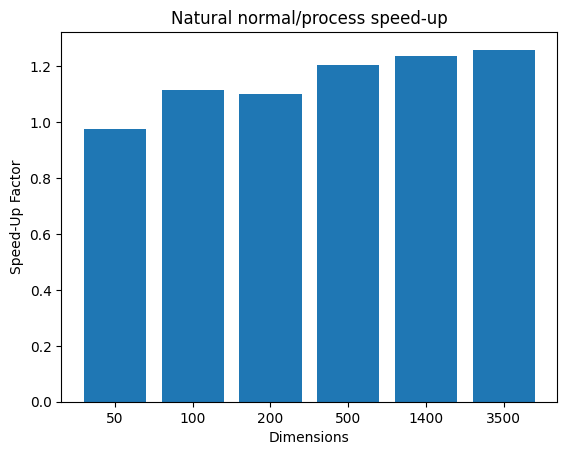

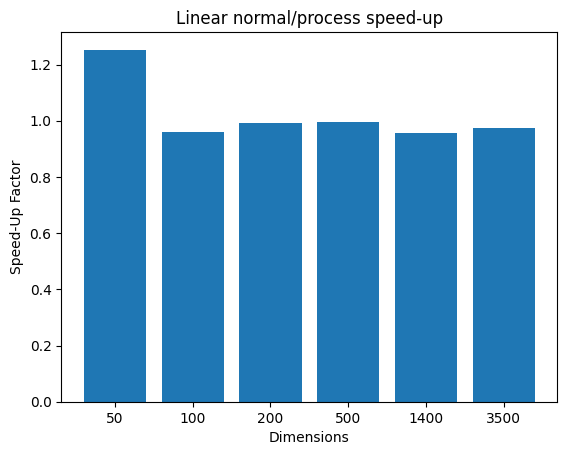

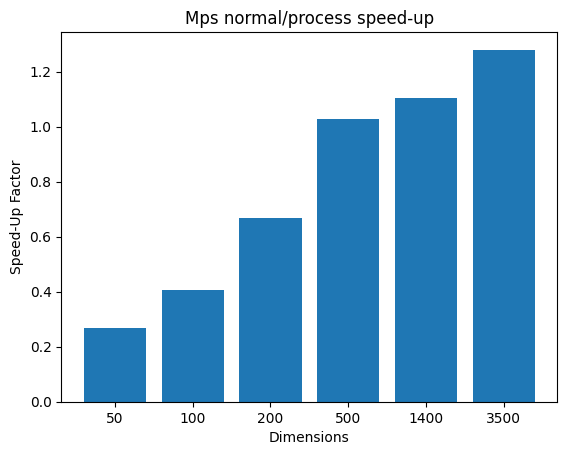

In [5]:
to_str_list = lambda array: [str(x) for x in array]

titles = ["Natural","Linear","Mps"]

for i in titles:
    y_axis = dimension_frame[f"{i.lower()} {suffix}"].to_numpy()
    x_axis = to_str_list(dimension_list)
    plt.bar(x_axis, y_axis)
    plt.xlabel('Dimensions')
    plt.ylabel('Speed-Up Factor')
    plt.title(f"{i} {suffix}")
    plt.show()


Having a constant number of dimensions (2^d) and variable number of points.

In [6]:
d = 10
points_list = [10, 100, 1000, 10_000, 15_000]
records = {'Points':points_list}
points_frame = pd.DataFrame(records)
points_frame = points_frame.set_index('Points')
names = set()


for method, method_name in run_list:
    name = method_name.split(" ")

    names.add(name[0])


    times = []
    
    for p in points_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(2 ** d, p, seed=test_seed)
        profiler.disable()
    
        stats = pstats.Stats(profiler)
        
        process_time = stats.total_tt


        times.append(process_time)
    
    points_frame[method_name] = times  
stats.sort_stats('cumulative')


names = list(names)     

#Speed up calculation
speed_up_cal(points_frame, comparison, points_list, suffix)


**Displaying the results of fixed dimension and variable number of points**

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (9,) and arg 1 with shape (5,).

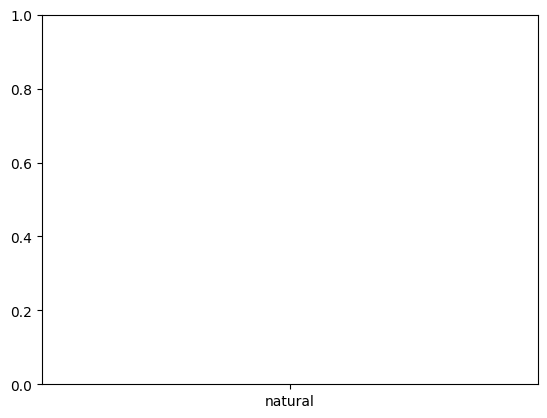

In [7]:
for i in titles:
    y_axis = points_frame[f"{i.lower()} {suffix}"].to_numpy()
    x_axis = to_str_list(points_frame)
    plt.bar(x_axis, y_axis)
    plt.xlabel('Dimensions')
    plt.ylabel('Speed-Up Factor')
    plt.title(f"{i} {suffix}")
    plt.show()

The code defines a list of tuples representing average values. It then extracts the first and second elements of each tuple into separate lists 'x' and 'y'. Finally, it converts the 'x' list to a string representation using the 'to_str_list' function.

In [ ]:

average_val = [(1, 0.196), (2, 0.204), (3, 0.202), (4, 0.199), (5, 0.199), ('Automatic', 0.197)]
x, y = zip(*average_val)
x = list(x)
y = list(y)
x = to_str_list(x)


This shows percentage of amount time and how much each core takes up of it. A smaller amount means that methodology is better. 

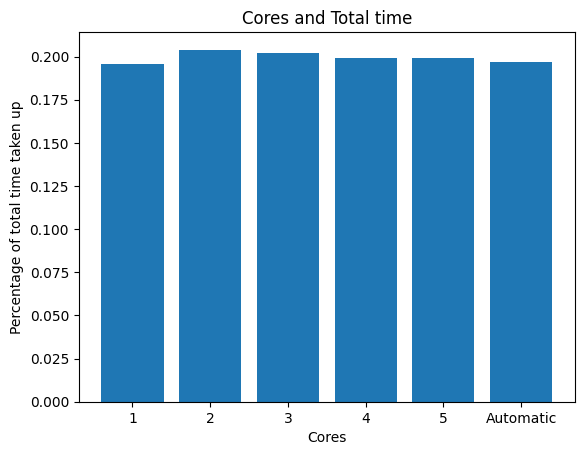

In [ ]:
plt.bar(x,y)
plt.xlabel('Cores')
plt.ylabel('Percentage of total time taken up')
plt.title('Cores and Total time')
plt.show()

In [ ]:
def natural_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,thread=True)
    points = l.gen_samples(num_ports) 
    return points
def linear_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,thread=True)
    points = l.gen_samples(num_ports) 
    return points
def mps_thread(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,thread=True)
    points = l.gen_samples(num_ports) 
    return points

**Having fixed sample points (2^n) with variable dimension**

We are running the multithreaded version of the code against the multprocessed version of the code

In [ ]:
trials = 5
dimension_list = [50, 100, 200, 500, 1400, 3500]
n = 10
names = set()

thread_run_list = [(natural_thread, "natural thread"),(linear_thread,"linear thread"),(mps_thread, "mps thread")]

for method,method_name in thread_run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for d in dimension_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, 2 ** n,seed=test_seed)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    dimension_frame[method_name] = times  
stats.sort_stats('cumulative')


names = list(names)  


             natural    linear       mps  natural process  linear process  \
Dimensions                                                                  
50          0.026510  0.016106  0.016809         0.030672        0.015670   
100         0.039462  0.028721  0.030589         0.039247        0.028712   
200         0.068907  0.060627  0.062744         0.070348        0.060220   
500         0.156121  0.143967  0.152039         0.133937        0.145140   
1400        0.413465  0.398182  0.424526         0.331593        0.400662   
3500        1.032673  1.002462  1.060776         0.805385        1.004082   

            mps process  mps process speed-up  linear process speed-up  \
Dimensions                                                               
50             0.058382              0.287925                 1.027831   
100            0.065590              0.466369                 1.000313   
200            0.089623              0.700089                 1.006754   
500          

The comparison list compares the different runtimes between each other, dividing the runtime of (a,b) as a/b. Giving the speed up factor with regard to the second function. Meaning that an end result of above 1 would mean function b is faster than function a. Also not that these results are added into the original frame.

In [ ]:
thread_process_comparison = [('mps thread', 'mps process'), ('linear thread', 'linear process'), ('natural thread', 'natural process')]


speed_up_cal(dimension_frame, thread_process_comparison, dimension_list, "multithreading / multiprocessing")

In [ ]:
print(dimension_frame)

             natural    linear       mps  natural process  linear process  \
Dimensions                                                                  
50          0.026510  0.016106  0.016809         0.030672        0.015670   
100         0.039462  0.028721  0.030589         0.039247        0.028712   
200         0.068907  0.060627  0.062744         0.070348        0.060220   
500         0.156121  0.143967  0.152039         0.133937        0.145140   
1400        0.413465  0.398182  0.424526         0.331593        0.400662   
3500        1.032673  1.002462  1.060776         0.805385        1.004082   

            mps process  mps process speed-up  linear process speed-up  \
Dimensions                                                               
50             0.058382              0.287925                 1.027831   
100            0.065590              0.466369                 1.000313   
200            0.089623              0.700089                 1.006754   
500          

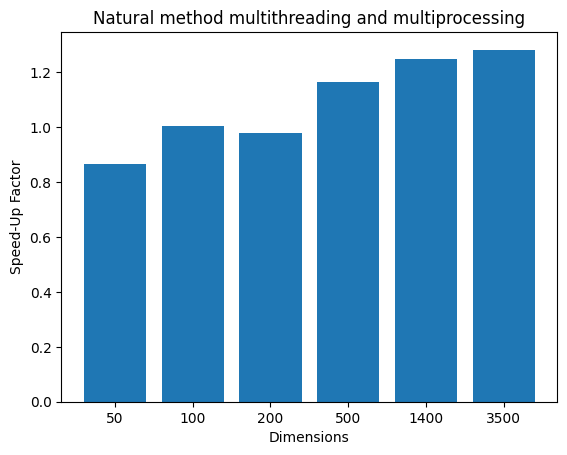

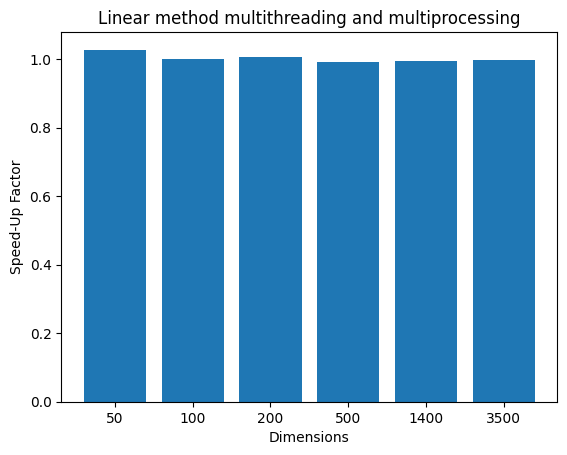

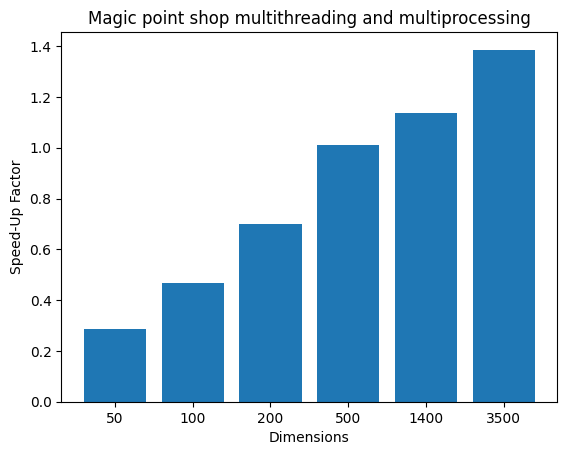

In [ ]:
y_axis = dimension_frame["natural process speed-up"].to_numpy()
x_axis = to_str_list(dimension_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method multithreading and multiprocessing')
plt.show()

y_axis = dimension_frame["linear process speed-up"].to_numpy()
x_axis = to_str_list(dimension_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Linear method multithreading and multiprocessing')
plt.show()

y_axis = dimension_frame["mps process speed-up"].to_numpy()
x_axis = to_str_list(dimension_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop multithreading and multiprocessing')
plt.show()

In [ ]:
trials = 5
d = 10
names = set()


for method,method_name in thread_run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for p in points_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(2 ** d, p, seed=test_seed)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    points_frame[method_name] = times  
stats.sort_stats('cumulative')


names = list(names)  

print(points_frame)


         natural    linear       mps  natural process  linear process  \
Points                                                                  
10      0.011669  0.006962  0.008365         0.013801        0.007080   
100     0.047728  0.039957  0.037112         0.041461        0.042283   
1000    0.308182  0.293729  0.310925         0.253305        0.305933   
10000   3.985495  4.699389  4.234171         2.891447        4.817175   
15000   4.712796  4.780637  4.901839         3.651310        4.779924   

        mps process  mps process speed-up  linear process speed-up  \
Points                                                               
10         0.010848              0.771035                 0.983362   
100        0.038861              0.954993                 0.944994   
1000       0.286898              1.083746                 0.960111   
10000      3.656355              1.158031                 0.975549   
15000      4.357115              1.125019                 1.000149  

In [ ]:
speed_up_cal(points_frame, thread_process_comparison, points_list, "multithreading / multiprocessing")
print(points_frame)

         natural    linear       mps  natural process  linear process  \
Points                                                                  
10      0.011669  0.006962  0.008365         0.013801        0.007080   
100     0.047728  0.039957  0.037112         0.041461        0.042283   
1000    0.308182  0.293729  0.310925         0.253305        0.305933   
10000   3.985495  4.699389  4.234171         2.891447        4.817175   
15000   4.712796  4.780637  4.901839         3.651310        4.779924   

        mps process  mps process speed-up  linear process speed-up  \
Points                                                               
10         0.010848              0.771035                 0.983362   
100        0.038861              0.954993                 0.944994   
1000       0.286898              1.083746                 0.960111   
10000      3.656355              1.158031                 0.975549   
15000      4.357115              1.125019                 1.000149  

Y-Axis [1.10112669 0.99213715 0.97218891 0.95302902 0.9511979 ] and length 5
X-Axis ['10', '100', '1000', '10000', '15000'] and length 5


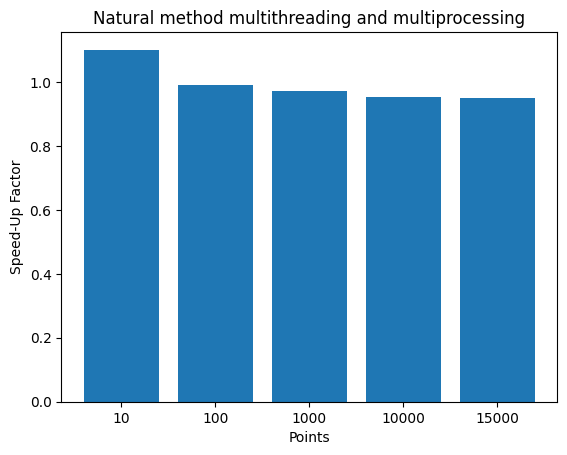

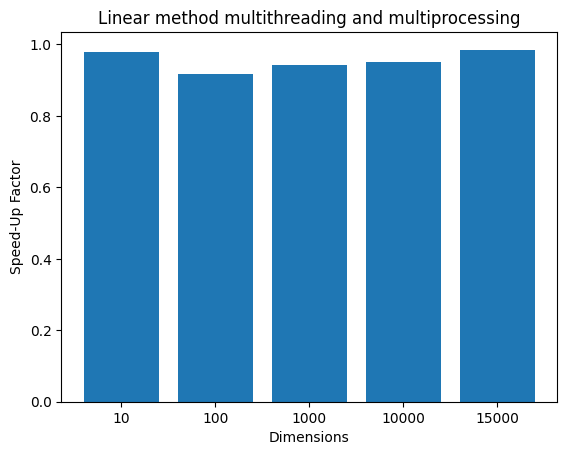

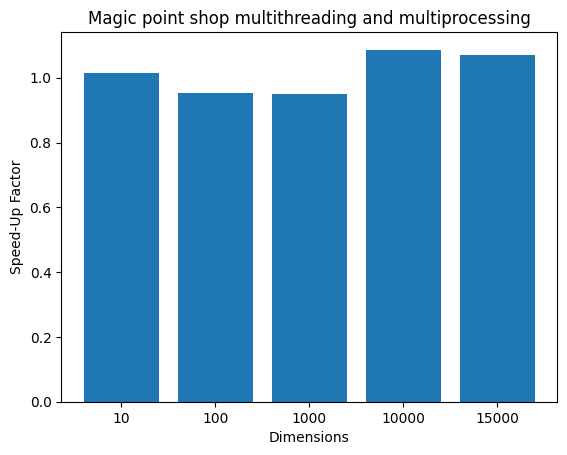

In [ ]:
y_axis = points_frame["natural thread multithreading / multiprocessing"].to_numpy()
x_axis = to_str_list(points_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method multithreading and multiprocessing')
plt.show()

y_axis = points_frame["linear thread multithreading / multiprocessing"].to_numpy()
x_axis = to_str_list(points_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Linear method multithreading and multiprocessing')
plt.show()


y_axis = points_frame["mps thread multithreading / multiprocessing"].to_numpy()
x_axis = to_str_list(points_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop multithreading and multiprocessing')
plt.show()
